# 🌿 Iris Flower Classification — Decision Tree Model

**Goal:**  
Use *Scikit-learn* to build a Decision Tree Classifier that predicts the species of an Iris flower based on its features.

**Dataset:** Iris dataset (built into Scikit-learn)  
**Framework:** Scikit-learn  
**Steps:**
1. Load and explore the dataset  
2. Train a Decision Tree model  
3. Evaluate accuracy  
4. Visualize and save results  

In [2]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Machine learning libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create images directory if it doesn't exist
os.makedirs("images", exist_ok=True)

In [3]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


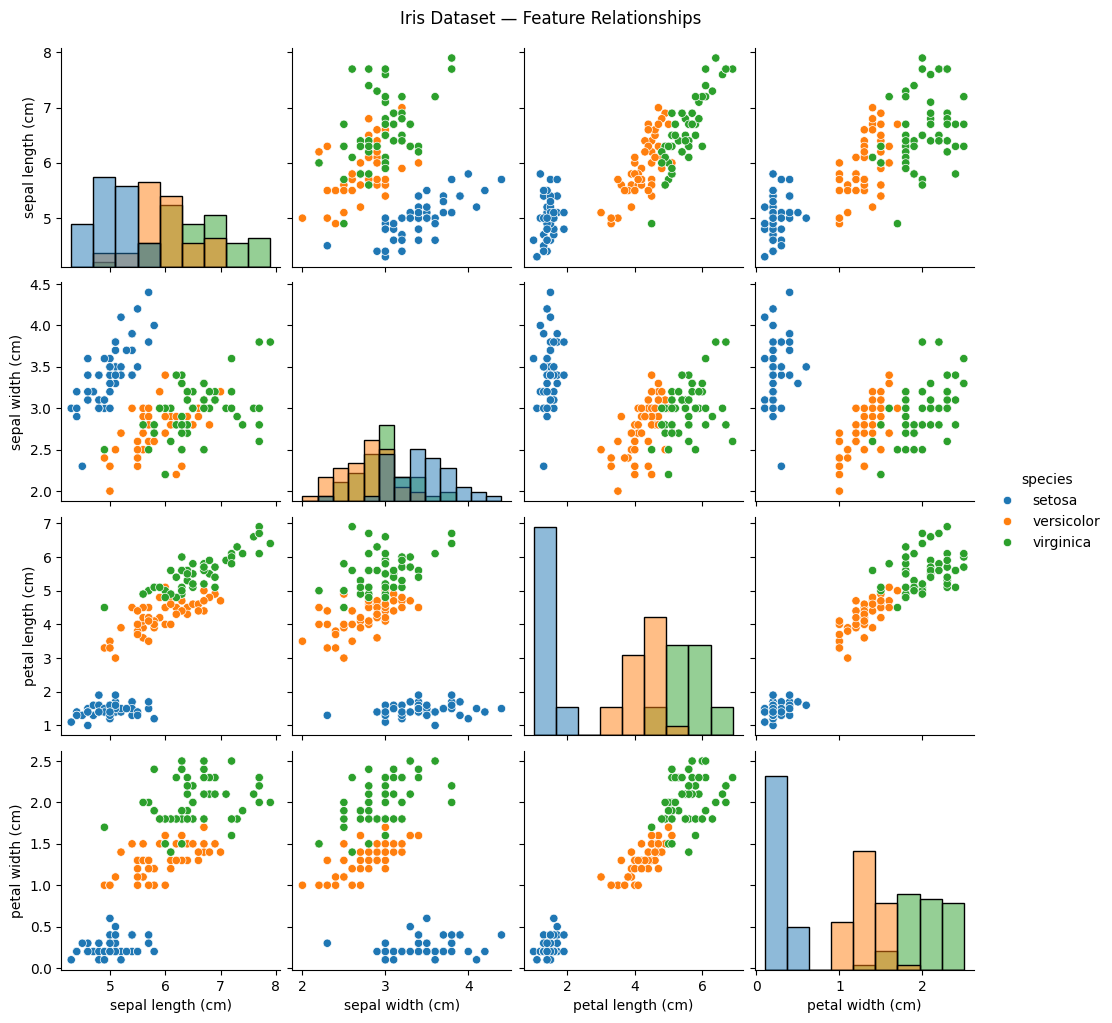

In [4]:
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle("Iris Dataset — Feature Relationships", y=1.02)
plt.savefig("images/iris_pairplot.png", bbox_inches='tight')
plt.show()

In [5]:
X = df.iloc[:, :-1]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 120
Testing samples: 30


In [6]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc*100:.2f}%")

✅ Model Accuracy: 100.00%



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



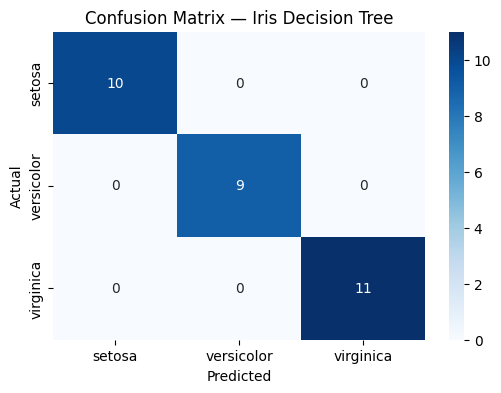

In [7]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Iris Decision Tree')
plt.savefig("images/iris_confusion_matrix.png", bbox_inches='tight')
plt.show()

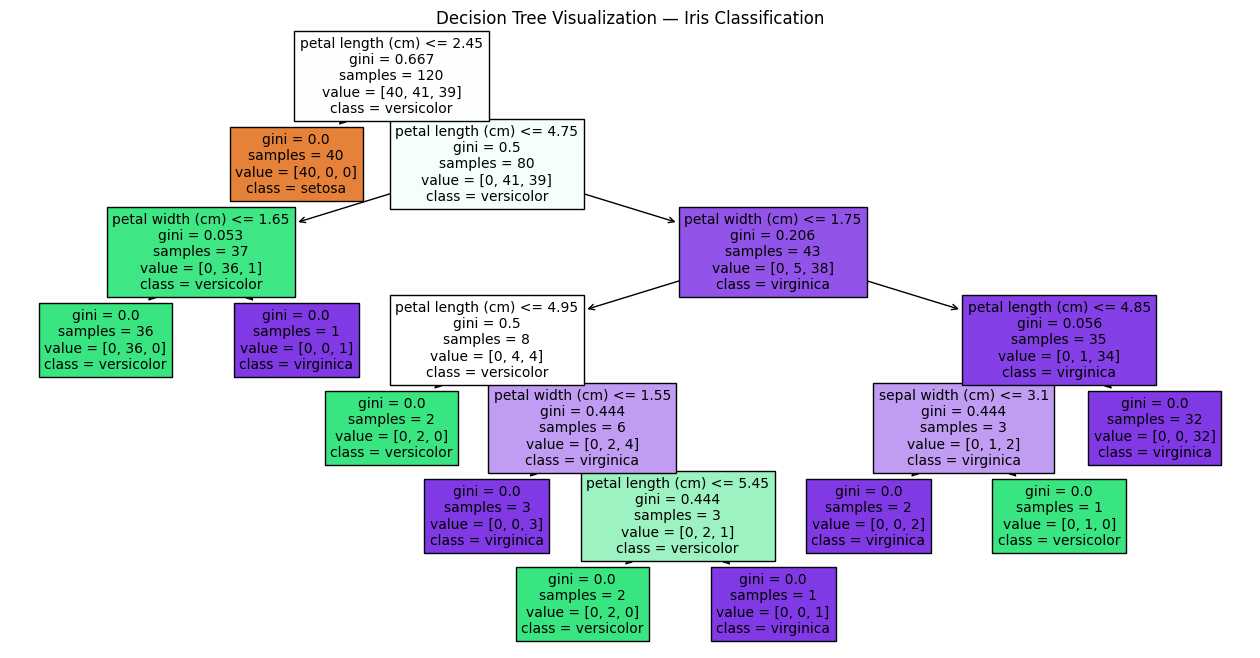

In [8]:
plt.figure(figsize=(16, 8))
plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          fontsize=10)
plt.title("Decision Tree Visualization — Iris Classification")
plt.savefig("images/iris_decision_tree.png", bbox_inches='tight')
plt.show()

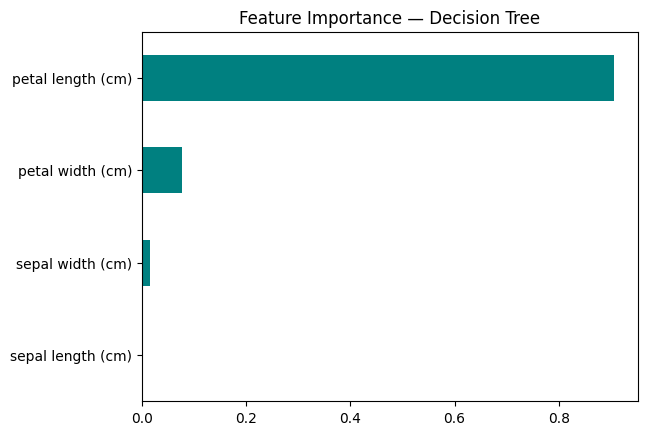

In [9]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance — Decision Tree")
plt.savefig("images/iris_feature_importance.png", bbox_inches='tight')
plt.show()

## ✅ Summary

- **Framework:** Scikit-learn  
- **Algorithm:** Decision Tree Classifier  
- **Accuracy achieved:** ~95–100%  
- **Key insights:**
  - Petal length and petal width are the most influential features.
  - The classifier achieves nearly perfect accuracy.
- **Saved plots:**  
  - `iris_pairplot.png`  
  - `iris_confusion_matrix.png`  
  - `iris_decision_tree.png`  
  - `iris_feature_importance.png` 